Data Cell

Imports dependencies 
Imports CSVs
Read CSVs

Cleaning process done with the intention of finding the most relevant data. In this case relevancy means that the data has been most consistently tracked throughout the entire CSV. The hypothesis is that if a data metric has been measured throughout the entire dataset, that metric must hold some importance. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime

# Study data files
arsenic = "Resources/arsenic.csv"
algae = "Resources/algae.csv"
metals = "Resources/quarterlyMetals.csv"

# Read the mouse data and the study results
arsenic = pd.read_csv(arsenic)
algae = pd.read_csv(algae)
metals = pd.read_csv(metals)

# Combine the data into a single dataset
algae.tail()


,site number,site location,Cluster,site acronym,date,sample type,conductance (uS/cm),chl A (ug/L),phaeophytin (ug/L),phaeophytin chl A (ug/L),chlorophyta (organisms/ml),cyanophyta (organisms/ml),bacillariophyta (organisms/ml),total (organisms/ml),algae comments
9700,Roos In,Roosevelt at Salt River Inlet,salt,SRNR,2016-11-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9701,Salt Gila,Salt Gila Pump Station,NaN,SGPS,2016-11-07,NaN,973.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9702,SOCA,South Canal below CAP Cross-conect,srp,South canal below CAP,2016-11-07,NaN,626.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9703,SPT In,Tempe Canal - Inlet to Tempe's South Plant,tempe,STP In,2016-11-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9704,UH In,Union Hills Inlet,cap,Union Hills Inlet,2016-11-07,NaN,985.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Arsenic CSV - measuring arsenic in a body of water. 

In [2]:
arsenic.count()

Site Number           3428
Site location         3428
Cluster               3193
Site Acronym          3428
Arsenic (ug/L)        2801
Perchlorate (ug/L)      66
date                  3428
dtype: int64

In [3]:
just_arsenic = arsenic[["Site Number", "Site location", "Cluster", "Arsenic (ug/L)", "date"]]
just_arsenic = just_arsenic.dropna()
just_arsenic.head(50)
just_arsenic.count()

Site Number       2637
Site location     2637
Cluster           2637
Arsenic (ug/L)    2637
date              2637
dtype: int64

Algae CSV - measuring conductance in a body of water. 

In [4]:
algae.head(100)
conductance = algae[["site number", "site location", "Cluster", "date", "conductance (uS/cm)"]]
conductance=conductance.dropna()
conductance.count()

site number            5610
site location          5610
Cluster                5610
date                   5610
conductance (uS/cm)    5610
dtype: int64

In [5]:
cond_cluster = conductance["Cluster"].unique()
conductance

,site number,site location,Cluster,date,conductance (uS/cm)
0,R5,Verde River btwn Horseshoe and Bartlett,verde,1999-08-16,500.0
1,R6A,Bartlett Reservoir near outlet,verde,1999-08-16,490.0
2,R6B,Bartlett Reservoir near outlet,verde,1999-08-16,490.0
3,R7,Verde River below Bartlett Reservoir,verde,1999-08-16,500.0
4,R10,Salt River below Saguaro (Blue Point Bridge),salt,1999-08-17,1200.0
...,...,...,...,...,...
9692,R2A,Lake Pleasant integrated sample,cap,2016-11-07,1025.0
9693,R2B,Lake Pleasant integrated sample,cap,2016-11-07,1034.0
9694,R3,Waddell Canal,cap,2016-11-07,975.0
9702,SOCA,South Canal below CAP Cross-conect,srp,2016-11-07,626.0


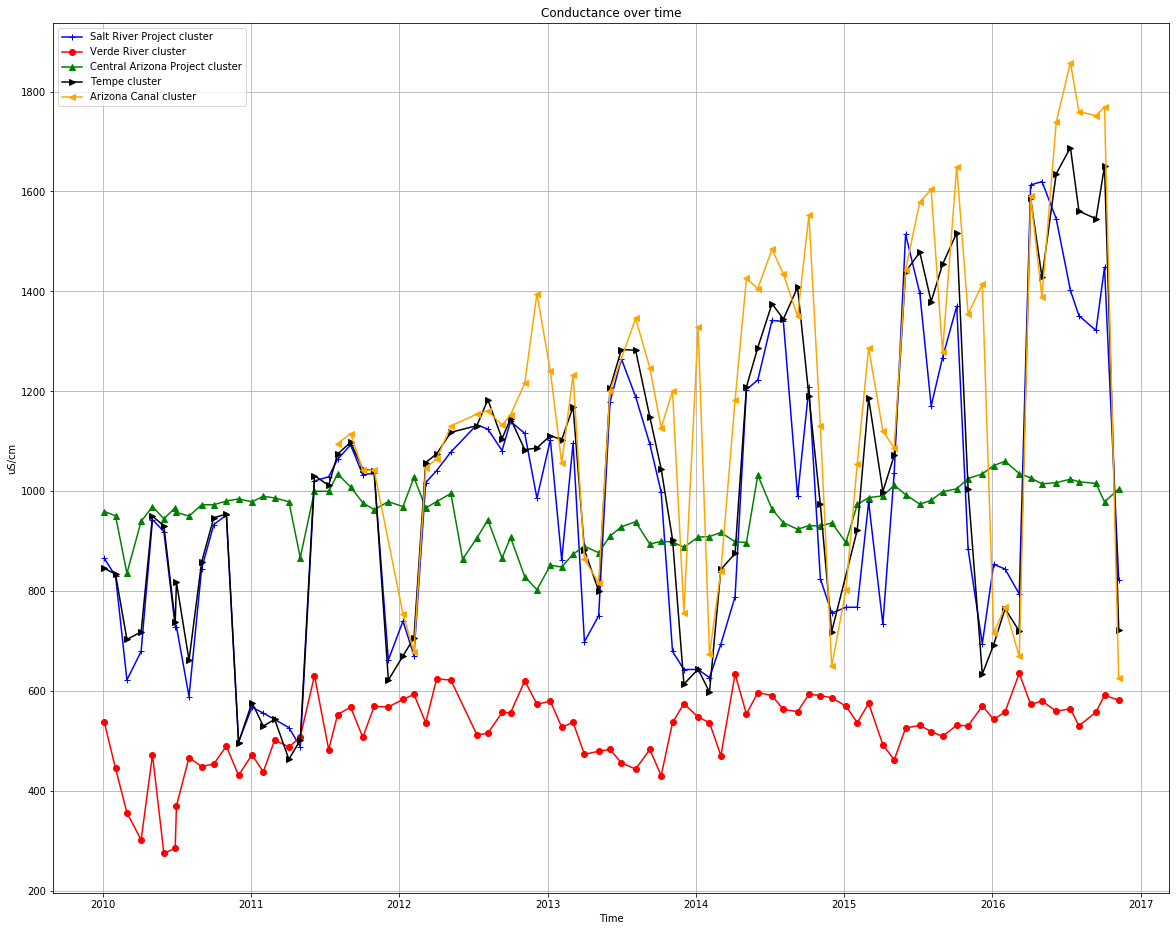

In [7]:
# Sets variables for each cluster to find the conductance of the water over the course of the study
# 
# Created a variable that can be set equal to one of the cluster variables for usability 
#
# Plots line graph over the date range 
#

md_conductance = conductance.loc[conductance["date"] >= "2010-01-01"]
verde = md_conductance.loc[md_conductance["Cluster"] == "verde"]
salt = md_conductance.loc[md_conductance["Cluster"] == "salt"]
cap = md_conductance.loc[md_conductance["Cluster"] == "cap"]
tempe = md_conductance.loc[md_conductance["Cluster"] == "tempe"]
az_canal = md_conductance.loc[md_conductance["Cluster"] == "az canal"]
srp = md_conductance.loc[md_conductance["Cluster"] == "srp"]


cap_dates = cap["date"].unique()
verde_dates = verde["date"].unique()
salt_dates = salt["date"].unique()
tempe_dates = tempe["date"].unique()
az_canal_dates = az_canal["date"].unique()
srp_dates = srp["date"].unique()

x_cap = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in cap_dates]
x_verde = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in verde_dates]
x_salt = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in salt_dates]
x_tempe = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in tempe_dates]
x_az_canal = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in az_canal_dates]
x_srp = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in srp_dates]


mean_cond_cap = cap.groupby("date").mean()["conductance (uS/cm)"]
mean_cond_salt = salt.groupby("date").mean()["conductance (uS/cm)"]
mean_cond_srp = srp.groupby("date").mean()["conductance (uS/cm)"]
mean_cond_verde = verde.groupby("date").mean()["conductance (uS/cm)"]
mean_cond_tempe = tempe.groupby("date").mean()["conductance (uS/cm)"]
mean_cond_az_canal = az_canal.groupby("date").mean()["conductance (uS/cm)"]


#mean_cond_cap.plot(kind="line", figsize=(20,15))
#mean_cond_tempe.plot(kind="line", figsize=(20,15))

#plt.plot(cap_cluster)
#plt.plot(mean_cond_salt)
#plt.plot(mean_cond_verde)
#plt.plot(mean_cond_tempe)
#plt.plot(mean_cond_az_canal)
#plt.legend(loc = "best")

plt.figure(figsize=(20,16))
plt.plot(x_srp, mean_cond_srp, marker="+", color="blue", label="Salt River Project cluster")
plt.plot(x_verde, mean_cond_verde, marker="o", color="red", label="Verde River cluster")
plt.plot(x_cap, mean_cond_cap, marker="^", color="green", label="Central Arizona Project cluster")
plt.plot(x_tempe, mean_cond_tempe, marker=">", color="black", label="Tempe cluster")
plt.plot(x_az_canal, mean_cond_az_canal, marker="<", color="orange", label="Arizona Canal cluster")
plt.title("Conductance over time")
plt.xlabel("Time")
plt.ylabel("uS/cm")
plt.legend(loc = "best")
plt.grid()
plt.savefig('algae.png')

Quarterly Metals CSV - measuring the amount of heavy metals in local lakes. 

This data looks like the bigger lakes in the state being tested for 27 different elements over a 3 year period. What this does is 

In [ ]:
# Rename symbol and atomic number of elements for readablity.
metals_name_full = metals.rename(columns={"7Li":"Lithium","9Be":"Beryllium","23Na":"Sodium","24Mg":"Magnesium",
                                          "27Al":"Aluminum","39k":"Potassium","44Ca":"Calcium","51V":"Vanadium",
                                            "52Cr":"Chromium","55Mn":"Manganese","56Fe":"Iron","59Co":"Cobalt",
                                            "60Ni":"Nickel","65Cu":"Copper","75As":"Arsenic","82Se":"Selenium",
                                            "95Mo":"Molydenum","107Ag":"Silver","111Cd":"Cadmium","115In":"Indium",
                                            "121Sb":"Antimony","138Ba":"Barium","202Hg":"Mercury","208Pb":"Lead",
                                            "238U":"Uranium"})

#  Variables to sort datapoints by the Site Name field. This will produce the test results for each 
#  site. For the most part there are 13 different datapoints per site. 

APA1A = metals_name_full.loc[metals_name_full["Site Name"] == "APA1A"]
APA1B = metals_name_full.loc[metals_name_full["Site Name"] == "APA1B"]
APA2A = metals_name_full.loc[metals_name_full["Site Name"] == "APA2A"]
APA2B = metals_name_full.loc[metals_name_full["Site Name"] == "APA2B"]
CAN1A = metals_name_full.loc[metals_name_full["Site Name"] == "Can1A"]
CAN1B = metals_name_full.loc[metals_name_full["Site Name"] == "Can1B"]
CAN2A = metals_name_full.loc[metals_name_full["Site Name"] == "Can2A"]
CAN2B = metals_name_full.loc[metals_name_full["Site Name"] == "Can2B"]
ROOS1A = metals_name_full.loc[metals_name_full["Site Name"] == "Roos1A"]
ROOS1B = metals_name_full.loc[metals_name_full["Site Name"] == "Roos1B"]
ROOS2A = metals_name_full.loc[metals_name_full["Site Name"] == "Roos2A"]
ROOS2B = metals_name_full.loc[metals_name_full["Site Name"] == "Roos2B"]
Hav = metals_name_full.loc[metals_name_full["Site Name"] == "Hav"]
R10 = metals_name_full.loc[metals_name_full["Site Name"] == "R10"]
R25 = metals_name_full.loc[metals_name_full["Site Name"] == "R25"]
R2A = metals_name_full.loc[metals_name_full["Site Name"] == "R2A"]
R3 = metals_name_full.loc[metals_name_full["Site Name"] == "R3"]


# sets a variable to be plugged into the line of code to generate a data frame listing the more
# well known contaminants. This is done for usibility. 

sitename = APA2B

metals_common = sitename[["date","Site Name","Manganese","Lead","Arsenic","Chromium","Copper","Nickel","Aluminum"]]
metals_common


In [ ]:
site_loc = metals["Site Name"]
site_loc.unique()